#PM3: First Draft and Progress Report ([presentation link](https://docs.google.com/presentation/d/1x0f_TOlJKiu6sIVaI-RIBynmladd02lt-9ZwkZsvPSE/edit#slide=id.p))

##<i>Part I: Current Project Status</i>

<i><b>tl;dr</b>: I've added more data to include more presidents and speeches, and labelling political affiliation on a gradient is too hard, so I'm going to switch to modeling other things.</i>

###Roadblocks

Since the last project milestone, I've obtained more data (which will be presented shortly) and, as a result of playing around with the original dataset, am strongly considering slightly tweaking my project objectives. Analyzing how conservative or liberal a president may be based on political rhetoric would likely involve creating a custom sentiment mapping, and while I have some familiarity with NLTK, I believe that a custom job would probably be beyond the scope of my skills at this time.

###New Data

As such, I've obtained a few other pieces of data that may allow me to do something similar to my original goal. These data (from various online sources) contain information like a president's political party, religious affiliation, age at inauguration and at death, and each president's aggregate rank according to various scholars.

In addition, I've also expanded the corpus of text to analyze to include state of the union addresses as well. Some presidents - primarily those who were not elected to office, mainly vice-presidents who assumed the position after their predecessors had either passed away or resigned - did not deliver inaugural addresses, and so I included more speeches to ensure more presidents were included in the sample.

###Changes in Project Scope and Objectives

With these new data, I now hope to use political rhetoric to model the newly-introduced categorical and continuous labels (e.g., party, religion, ranking) and potentiall gain insight to the following questions, among others:
<ul>
<li>What common language, themes, and phrases do our greatest presidents have in common in their rhetoric?</li>
<li>Is there a quanitifiable relationship between these rhetorical traits and how great a president is perceived to be?</li>
<li>Does a president's specific religious background affect the language used in speeches?</li>
</ul>

##<i>Part II: Previous Milestone (PM2): Data Ready</i>

<i>This section contains mostly data pre-processing and initial exploratory data analysis. If you're interested in what I've done since the previous milestone deadline, feel free to skip ahead to <b>Part III</b>.</i>

<b>Data Sources:</b>
<ul>
<li>Inaugural Addresses and States of the Union: Project Gutenberg</li>
<li>[Presidential Data](http://www.infoplease.com/ipa/A0194030.html): Infoplease</li>
<li>[Presidential Rankings](https://en.wikipedia.org/wiki/Historical_rankings_of_Presidents_of_the_United_States#Five_Thirty_Eight_analysis): Wikipedia/538</li>
</ul>

Structured data can be found [here](https://docs.google.com/spreadsheets/d/1cujFV5JLRivY-k6LMEDCP8_zapHUtwNCdb9Qr8h2gOQ/edit#gid=0).

####<i>Step 1: Pre-processing - Parsing Speeches</i>

First, let's import all the packages we'll need to clean the data:
<ul>
<li><code>re</code> for regular expression functions</li>
<li><code>pprint</code> to make printing more readable</li>
<li><code>string</code> to clean string values</li>
<li><code>pandas</code> because <i>duh</i></li>
<li><code>numpy</code> because math</li>
<li><code>matplotlib.pyplot</code> for charts</li>
<li><code>CountVectorizer</code> for parsing tokens and removing stop words</li>
</ul>

In [1]:
%matplotlib inline

import re
import pprint as pp
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

Next, we'll open the text files and read them into Python objects that can be parsed.

In [2]:
# Inaugural speech text
inaugural = open('../data/inaugural.txt', 'r')
inaugural_text = inaugural.read()

# State of the Union text
sotu = open('../data/sotu.txt', 'r')
sotu_text = sotu.read()

First, we'll parse the inaugural speech data using <code>re</code> modules.

In [3]:
# Create list of speech titles which will act as speech IDs
raw_speech_id_list = re.findall(r'\*\s\*\s\*\s\*\s\*([\w\s\,\.]+)ADDRESS',
                                inaugural_text)

We'll use a <code>string</code> method (<code>strip</code>) to remove extraneous characters from the title list first. Later, we'll create a <code>dict</code> object that will have each title as a key and each full speech text as a value.

In [4]:
stripped_id_list = [string.strip(title, "\r\n ") for title in raw_speech_id_list]

Let's move on to cleaning the speech text since we've cleaned the titles.

All the speeches in the text file are separated by \* \* \* \* \* delimiters, so we'll use <code>re.split</code> again to extract all the text between the delimiters.

In [5]:
raw_speech = re.split(r'\*\s\*\s\*\s\*\s\*', inaugural_text)

Next, we'll use <code>re.sub</code> to replace the "Transcriber's Notes" because we only want the speech text for each inaugural address. We'll also ignore the first and last elements in the <code>raw_speech</code> list because it isn't actually speech text.

In [6]:
speeches = [re.sub(r'^([\w\W\s]+)\]', "", speech) for speech in raw_speech[1:len(raw_speech)-1]]

print len(speeches)

55


Finally, we'll use a combination of <code>re.sub</code> and <code>string.strip</code> to clean up all the extra spaces and newline characters in each speech.

In [41]:
clean_speeches = []
[clean_speeches.append(re.sub(r'\r\n',
                              " ",
                              string.strip(speech,
                                           "\r\n"))) 
 for speech in speeches]

print len(clean_speeches)

55


It looks like most of the works is done, but you'll see that the last three speeches still contain extranous test (mostly speech IDs) that should be removed, so we'll take the last use <code>re.sub</code> on the last three to extract the last bit of cruft before moving on.

In [8]:
clean_speeches_inaugural = [re.sub(r'([A-Z0-9\,\.\s]+)\s{3}', "", speech) 
                            for speech in clean_speeches]

Now that the inaugural data is clean, let's follow similar steps to clean the State of the Union (SOTU) speeches. Again, we'll use <code>re</code> modules to extract the text.

First, we'll create a list of titles that will serve as speech IDs. Rather than extracting using Python, however, it'll be easier to just copy and paste the SOTU titles and load it into a Python list :)

In [9]:
raw_speech_id_list_sotu = [
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'John Adams, State of the Union Address',
'John Adams, State of the Union Address',
'John Adams, State of the Union Address',
'John Adams, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Martin van Buren, State of the Union Address',
'Martin van Buren, State of the Union Address',
'Martin van Buren, State of the Union Address',
'Martin van Buren, State of the Union Address',
'John Tyler, State of the Union Address',
'John Tyler, State of the Union Address',
'John Tyler, State of the Union Address',
'John Tyler, State of the Union Address',
'James Polk, State of the Union Address',
'James Polk, State of the Union Address',
'James Polk, State of the Union Address',
'James Polk, State of the Union Address',
'Zachary Taylor, State of the Union Address',
'Millard Fillmore, State of the Union Address',
'Millard Fillmore, State of the Union Address',
'Millard Fillmore, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'James Buchanan, State of the Union Address',
'James Buchanan, State of the Union Address',
'James Buchanan, State of the Union Address',
'James Buchanan, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'William McKinley, State of the Union Address',
'William McKinley, State of the Union Address',
'William McKinley, State of the Union Address',
'William McKinley, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'William H. Taft, State of the Union Address',
'William H. Taft, State of the Union Address',
'William H. Taft, State of the Union Address',
'William H. Taft, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Warren Harding, State of the Union Address',
'Warren Harding, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'John F. Kennedy, State of the Union Address',
'John F. Kennedy, State of the Union Address',
'John F. Kennedy, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Gerald R. Ford, State of the Union Address',
'Gerald R. Ford, State of the Union Address',
'Gerald R. Ford, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'George H.W. Bush, State of the Union Address',
'George H.W. Bush, State of the Union Address',
'George H.W. Bush, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address'
]

# Capitalize speech IDs to conform to Inaugural Address data
raw_speech_id_list_sotu_caps = []
[raw_speech_id_list_sotu_caps.append(item.upper()) for item in raw_speech_id_list_sotu]

pp.pprint(raw_speech_id_list_sotu_caps[:2])

['GEORGE WASHINGTON, STATE OF THE UNION ADDRESS',
 'GEORGE WASHINGTON, STATE OF THE UNION ADDRESS']


In [10]:
# Parse out speech IDs and append them to a list
speech_id_list_sotu = []
[speech_id_list_sotu.append(re.findall(r'^(.*?)\sADDRESS',
                                       speech)[0])
 for speech in raw_speech_id_list_sotu_caps]

pp.pprint(speech_id_list_sotu[:2])

['GEORGE WASHINGTON, STATE OF THE UNION',
 'GEORGE WASHINGTON, STATE OF THE UNION']


In [11]:
# Combine the speech IDs into a single list
title_list = stripped_id_list + speech_id_list_sotu

Now for the hard part: let's grab the actual speech text for each State of the Union speech. First, we'll split the full text file; each speech is separated by \*\*\*, so we'll split using that.

In [12]:
raw_speech_sotu = re.split(r'\*\*\*\r\n\r\n', sotu_text)

# Actual speeches start at index 4 and end at index -3
raw_speech_sotu = raw_speech_sotu[4:-3]

To clean things up just a bit more, we'll remove the title information in each speech text.

In [40]:
clean_speeches_sotu = []
[clean_speeches_sotu.append(re.findall(r'[0-9]{4}([\w\W\s\S]+)$',
                            speech)[0])
                            for speech in raw_speech_sotu]

print len(clean_speeches_sotu)

214


Now that both sets of speeches have been properly cleaned, we'll add them both together, then run the aggregated set of speeches through <code>CountVectorizer</code> to tokenize all the words.

In [14]:
clean_speeches_all = clean_speeches_inaugural + clean_speeches_sotu

In [15]:
vect = CountVectorizer(decode_error = 'ignore', stop_words='english')
vect.fit(clean_speeches_all)
raw_feature_names = [token.encode('ascii','ignore') for token in vect.get_feature_names()]

From here, we'll create a document-term matrix that will allow us to then create a <code>DataFrame</code> that counts the number of times each token appears in each speech. We'll also remove all non-word tokens:

In [16]:
dtm = vect.transform(clean_speeches_all)
dtm.toarray()
raw_df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

In [17]:
df = raw_df.iloc[:,raw_feature_names.index('______________________')+1:]

df['title_id'] = title_list

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

/Users/Jay/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Phew! We're done with that part. There's still more to do though!

####<i>Step 2: Pre-processing - Joining Data and Selecting Features</i>

Now we'll load the other datasets into <code>DataFrame</code>s:

In [18]:
# Load president details into DataFrame
df_prez = pd.read_csv('../data/presidents.csv')

# Load aggregated president rankings into DataFrame
df_rankings = pd.read_csv('../data/prez_rankings_538.csv')

Since the full dataset pulls together data from multiple sources, we'll need to very strategic about what data we join together to create the dataset that will be most effectively interpreted by the models we will use. Ideally, we'd like to be able join all the disparate data together using some common key ID, which unfortunately is not available, so it will need to be manufactured first before the data can be combined. Luckily, the <code>presidents.csv</code> file has an <code>id</code> feature that can be used to create other <code>id</code> in the other datasets.

It would likely be more difficult to do this programmatically, so, in the interest of keeping things simple, let's write the current <code>DataFrame</code>s to files and manually tag each of the speeches with each president's <code>id</code>. A much larger dataset would probably require writing code to assign <code>id</code>s.

In [19]:
# Write speech DataFrame data to a file
file_df = open('../data/df.csv', 'w')
for row in df.title_id:
    file_df.write(row)
    file_df.write('\n')

file_df.close()

So after a little manual labor thanks to magic data entry elves, we can re-load the speech data into the <code>DataFrame</code>s, now with each president's respective <code>id</code>. Then we'll replace the existing columns in the <code>DataFrame</code> with the new data.

In [35]:
# Load newly-tagged data
df_with_id = pd.read_csv('../data/df_with_id.csv')

# Concat loaded DataFrame to old DataFrame
df = pd.concat([df_with_id, df.iloc[:,9:]], axis=1)

print df.head()

print '# of records: ' + str(len(df)) + ' | # of tokens: ' + str(len(df.columns.values))

   id               name            speech  a14  aaa  aaron  abandon  \
0   1  GEORGE WASHINGTON   FIRST INAUGURAL    0    0      0        0   
1   1  GEORGE WASHINGTON  SECOND INAUGURAL    0    0      0        0   
2   2         JOHN ADAMS         INAUGURAL    0    0      0        0   
3   3   THOMAS JEFFERSON   FIRST INAUGURAL    0    0      0        1   
4   3   THOMAS JEFFERSON  SECOND INAUGURAL    0    0      0        0   

   abandoned  abandoning  abandonment   ...     zimbabwe  zimbabwean  zinc  \
0          0           0            0   ...            0           0     0   
1          0           0            0   ...            0           0     0   
2          1           0            0   ...            0           0     0   
3          0           0            0   ...            0           0     0   
4          0           0            0   ...            0           0     0   

   zion  zollverein  zone  zones  zoological  zooming  zuloaga  
0     0           0     0      0 

We're finally done with our preliminary <code>DataFrame</code>, so now let's load the last of the data (personal details and rankings for each president).

In [27]:
# Load president details into DataFrame
df_prez = pd.read_csv('../data/presidents.csv')

# Load aggregated president rankings into DataFrame
df_rankings = pd.read_csv('../data/prez_rankings_538.csv')

In [25]:
df_prez.head()

,id,name_and_party,name,party_letter,party_name,term,state_of_birth,birth_date,death_date,religion,age_inauguration,age_death
0,1,Washington (F)3,Washington,F,Federalist,1789–1797,Va.,2/22/1732,12/14/1799,Episcopalian,57,67
1,2,J. Adams (F),J. Adams,F,Federalist,1797–1801,Mass.,10/30/1735,7/4/1826,Unitarian,61,90
2,3,Jefferson (DR),Jefferson,DR,Democratic Republican,1801–1809,Va.,4/13/1743,7/4/1826,Deist,57,83
3,4,Madison (DR),Madison,DR,Democratic Republican,1809–1817,Va.,3/16/1751,6/28/1836,Episcopalian,57,85
4,5,Monroe (DR),Monroe,DR,Democratic Republican,1817–1825,Va.,4/28/1758,7/4/1831,Episcopalian,58,73


In [28]:
df_rankings.head()

,id,rank_aggregate,president
0,16,1,Abraham Lincoln
1,32,2,Franklin D. Roosevelt
2,1,3,George Washington
3,26,4,Theodore Roosevelt
4,3,5,Thomas Jefferson


Now that everything is loaded, we can use <code>pd.merge</code> to create our master <code>DataFrame</code>:

In [36]:
# Join presidential details DataFrame
df_merge_details = pd.merge(df, df_prez, on="id", how="left", left_index=True)

   id             name_x            speech  a14  aaa  aaron  abandon  \
0   1  GEORGE WASHINGTON   FIRST INAUGURAL    0    0      0        0   
0   1  GEORGE WASHINGTON  SECOND INAUGURAL    0    0      0        0   

   abandoned  abandoning  abandonment    ...           name_y  party_letter  \
0          0           0            0    ...      Washington              F   
0          0           0            0    ...      Washington              F   

   party_name     term_y  state_of_birth  birth_date  death_date  \
0  Federalist  1789–1797             Va.   2/22/1732  12/14/1799   
0  Federalist  1789–1797             Va.   2/22/1732  12/14/1799   

     religion_y  age_inauguration  age_death  
0  Episcopalian                57         67  
0  Episcopalian                57         67  

[2 rows x 22756 columns]


In [56]:
# Join aggregate rankings DataFrame
df_all = pd.merge(df_merge_details, df_rankings, on="id", how="left", left_index=True)
print df_all[df_all.religion_y == 'Roman Catholic']

   id           name_x              speech  a14  aaa  aaron  abandon  \
8  35  JOHN F. KENNEDY           INAUGURAL    0    0      0        0   
8  35  JOHN F. KENNEDY  STATE OF THE UNION    0    0      0        0   
8  35  JOHN F. KENNEDY  STATE OF THE UNION    0    0      0        1   
8  35  JOHN F. KENNEDY  STATE OF THE UNION    0    0      0        1   

   abandoned  abandoning  abandonment       ...         party_name     term_y  \
8          0           0            0       ...         Democratic  1961–1963   
8          0           0            0       ...         Democratic  1961–1963   
8          0           1            0       ...         Democratic  1961–1963   
8          0           0            1       ...         Democratic  1961–1963   

   state_of_birth  birth_date  death_date      religion_y  age_inauguration  \
8           Mass.   5/29/1917  11/22/1963  Roman Catholic                43   
8           Mass.   5/29/1917  11/22/1963  Roman Catholic                43

####<i>Step 3: Exploring the Aggregated Data - Plotting</i>

In this section, we'll use aggregate functions to explore and plot the data in order to see if we can coax out any potential trends in the data before applying any models.

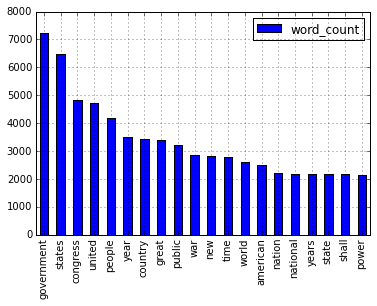

In [49]:
# 1. Visualize the most commonly-used words in aggregate
df_counts = pd.DataFrame(df.iloc[:,3:].apply(np.sum, axis=0), columns=['word_count'])
df_counts_sorted = df_counts.sort(['word_count'], ascending = [0])[:20]

df_counts_sorted.plot(kind='bar')

In [60]:
# 2. Group DataFrame values by religion, then visualize most used words by each religious affiliation

# First use groupby to create word counts by religion
df_religion = df_merge_details.groupby('religion_y').sum()
df_religion = df_religion.iloc[:, 1:-1]

# Find the most used words by religious affiliation
print df_religion.idxmax(axis=1)

religion_y
Baptist                     world
Congregationalist      government
Deist                       shall
Disciples of Christ        people
Episcopalian               states
Methodist                  states
Presbyterian           government
Quaker                 government
Reformed Dutch         government
Roman Catholic                new
Southern Baptist            world
Unitarian                  states
dtype: object


In [61]:
# 3. Group DataFrame values by party, then visualize most used words by each party

# First use groupby to create word counts by party
df_party = df_merge_details.groupby('party_name').sum()
df_party = df_party.iloc[:, 1:-1]

# Find the most used words by religious affiliation
print df_party.idxmax(axis=1)

party_name
Democratic               government
Democratic Republican        states
Federalist                   states
Republican               government
Union                        states
Whig                     government
dtype: object


Frankly speaking, we haven't gleaned anything really meaningful from exploring the data (at least in the ways above), so let's use a new tool - <b>Natural Language Processing</b> - to see if we can engineer some features that will make the trends in the data a little more apparent.

####<i>Step 4: Exploring the Aggregated Data - Applying Natural Language Processing (NLP)</i> 

First, we'll use some stemming modules from <b><code>NLTK</code></b> (specifically <b><code>PorterStemmer</code></b>) to reduce the number of features in the master <code>DataFrame</code>:

In [75]:
# Import PorterStemmer
from nltk.stem.porter import PorterStemmer

# Instantiate a new PorterStemmer object
ps = PorterStemmer()

# Create Python list of tokens in DataFrame
word_list = list(df_party.iloc[:,:].columns.values)

# Use PorterStemmer to stem the tokens
stems = [ps.stem(token) for token in word_list]
stems_set = set(stems)

print len(stems_set)

12632


Using <code>PorterStemmer</code>, we've effectively cut the number of features in half!

In [90]:
# TODO(justindelatorre): How can we practically use Porter Stemming with the master data to cut out features?
# - Might be worth stemming the tokens before adding to master DataFrame (would require re-work of data munging $%&!)
# - Then, we can pass stems through LDA to get potentially more meaningful topic clusters
# - Can also use grouped topics as features for Naïve Bayes modeling?

##<i>Part III: Testing and Training Models</i>

####<i>Step 1: Implementing and Experimenting with LDA ([documentation](https://pypi.python.org/pypi/lda))</i>

Another handy NLP application is <b>[latent Dirichlet allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) (LDA)</b>, which allows us to unearth hidden topics among the text we're examining. We can use this to potentially reduce our features even more, and in an even more meaningful way due to topic clustering.

In [91]:
# Manipulate data so it can be passed through the LDA instance
df_id_only = pd.concat([df.iloc[:,:1], df.iloc[:,3:]], axis=1)
df_id_only_grouped = df_id_only.groupby('id').sum()

# Turn the DataFrame into a matrix of numpy arrays, will serve as X in LDA
df_matrix = df_id_only_grouped.as_matrix(columns=None)

# Import LDA module
import lda

# Create new instance of LDA that will group into 20 topics
# and cycle through 1000 iterations
model = lda.LDA(n_topics=20, n_iter=1000, random_state=1)
model.fit(df_matrix)
topic_word = model.topic_word_
n_top_words = 12

# Note: word_list was generated in the above section on stemming
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(word_list)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: states government united congress foreign shall treaty department state year time
Topic 1: year states people legislation attention subject fiscal law congress number free
Topic 2: world people great time nation way new hope right good come
Topic 3: year world economic nations program free million dollars fiscal security war
Topic 4: commerce citizens great attention intercourse treasury revenue vessels tribes object debt
Topic 5: american international court canal law department men tariff navy proper commerce
Topic 6: men man work business corporations law good far power need interstate
Topic 7: war shall men peace american nations nation united life free let
Topic 8: years reduction local prosperity general administration commission justice authority construction welfare
Topic 9: federal new programs nation growth energy administration union percent years help
Topic 10: america people americans work years new year let american children congress
Topic 11: general government 

Now that we have some semblance of topic clustering, we can use <code>lda</code>'s <b><code>doc\_topic\_</code></b> function to figure out the most prominent topic (based on the above list) that each president focused on within the corpus of all his speeches in the dataset.

In [98]:
# Find the most prevalent topic among each president's collection of speeches

# Create list of president IDs
prez_ids = df_id_only_grouped.index

doc_topic = model.doc_topic_
for i in range(len(prez_ids)):
    print("{} (top topic: {})".format(prez_ids[i], doc_topic[i].argmax()))

1 (top topic: 4)
2 (top topic: 4)
3 (top topic: 4)
4 (top topic: 4)
5 (top topic: 4)
6 (top topic: 4)
7 (top topic: 14)
8 (top topic: 17)
9 (top topic: 14)
10 (top topic: 0)
11 (top topic: 18)
12 (top topic: 0)
13 (top topic: 0)
14 (top topic: 0)
15 (top topic: 0)
16 (top topic: 0)
17 (top topic: 0)
18 (top topic: 0)
19 (top topic: 0)
20 (top topic: 7)
21 (top topic: 0)
22 (top topic: 1)
23 (top topic: 1)
24 (top topic: 14)
25 (top topic: 0)
26 (top topic: 6)
27 (top topic: 5)
28 (top topic: 7)
29 (top topic: 12)
30 (top topic: 8)
31 (top topic: 8)
32 (top topic: 2)
33 (top topic: 3)
34 (top topic: 3)
35 (top topic: 9)
36 (top topic: 10)
37 (top topic: 10)
38 (top topic: 9)
39 (top topic: 9)
40 (top topic: 10)
41 (top topic: 10)
42 (top topic: 10)
43 (top topic: 13)


Based on the results above, using LDA (at least on all the tokens, rather than a potentially more meaningful subset) gives us a slightly better look at any trends in all of the presidential speeches we're examining, but nothing glaringly meaningful sticks out just yet.

Let's move on to using Naïve Bayes, where we hope to be able to predict, at least with some level of accuracy higher than a coin flip, the likelihood that a president is either of a certain party or religious affiliation based on the themes and words in the speeches, and if certain words and themes are predictive of our more highly-regarded presidents.

####<i>Step 2: Probabilities, Predictions, and Presidents with Naïve Bayes</i>

####<i>Step 3: Using Outside Data</i>

Unfortunately, there are limited full-text transcripts of speeches from the fake presidents - Jed Bartlett and Matt Santos from <i>The West Wing</i> - I wanted to run through the trained model. But, I've worked really hard to get to this point, so I'd like to at least see how good the model is, given that we know both president's outcome labels (both presidents were Roman Catholics and Democrats).

Knowing that, I will march on and use any available text from the show transcripts in which either president gave some sort of speech. I know this is technically not the way to go given the model was trained and tested using specifically Inaugural Address and State of the Union text, but this is my project, so sue me :)

In [ ]:
# Load text into memory for data wrangling

# Create arrays and DataFrames for each West Wing president

# Apply the trained Naïve Bayes model to the aggregate text for each president

##<i>Part IV: Conclusions</i>